In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)

In [2]:
import csv


In [3]:
data_sha = pd.read_csv(r'..\Data\attacks.csv', encoding='latin1')

In [4]:
data_sha.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
sharks = data_sha.copy()

In [6]:
sharks.shape

(25723, 24)

In [7]:
sharks.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
nan_cols=sharks.isna().mean() * 100
nan_cols[nan_cols>0]


Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

In [9]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

In [11]:
def check_nan(data: pd.DataFrame) -> None:
    
    nan_cols=data.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(data.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show()

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

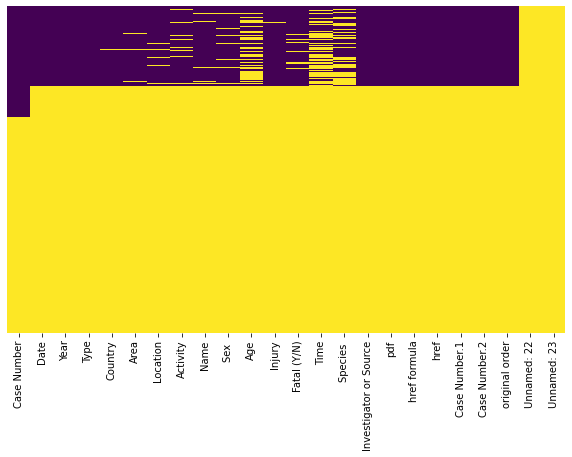

In [12]:
check_nan(sharks)

In [13]:
# Drop Both Unnamed columns
sharks.drop(columns=nan_cols[nan_cols>98].index, inplace=True)

'N nan cols: 22'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
dtype: float64

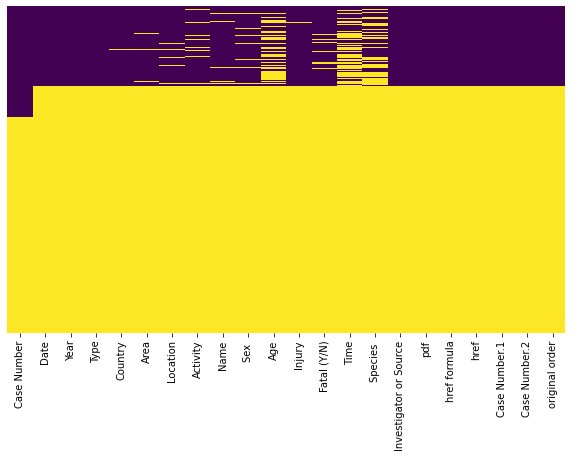

In [14]:
check_nan(sharks)

In [15]:
bad_index_Date=sharks.Date[sharks.Date.isna()].index

In [16]:
bad_index_Date[:10]

Int64Index([6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311], dtype='int64')

In [17]:
bad_index_Year=sharks.Year[sharks.Year.isna()].index

In [18]:
bad_index_Year[:10]

Int64Index([187, 6079, 6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309], dtype='int64')

In [19]:
# crear un indicador de nulos por fila

# desglosado


num_nan=[]

for fila in sharks.itertuples():
    
    check=[]
    
    for e in fila:
        
        check.append(pd.isna(e))
        
    num_nan.append(sum(check))
    
num_nan[:23]

[0, 1, 1, 2, 2, 3, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 3, 0, 2, 1, 0, 1]

In [20]:
sharks['num_nan']=[sum([pd.isna(e) for e in fila]) for fila in sharks.itertuples()]

In [21]:
sharks[sharks.num_nan>20].shape

(19414, 23)

In [22]:
sharks.shape

(25723, 23)

In [23]:
sharks1 = sharks.copy()

In [24]:
sharks1.drop(sharks1[sharks1.num_nan>=20].index, axis=0, inplace=True)

In [25]:
sharks1.shape

(6302, 23)

'N nan cols: 16'

Case Number                0.015868
Year                       0.031736
Type                       0.063472
Country                    0.793399
Area                       7.219930
Location                   8.568708
Activity                   8.632180
Name                       3.332275
Sex                        8.965408
Age                       44.922247
Injury                     0.444303
Fatal (Y/N)                8.552840
Time                      53.221200
Species                   45.033323
Investigator or Source     0.269756
href formula               0.015868
dtype: float64

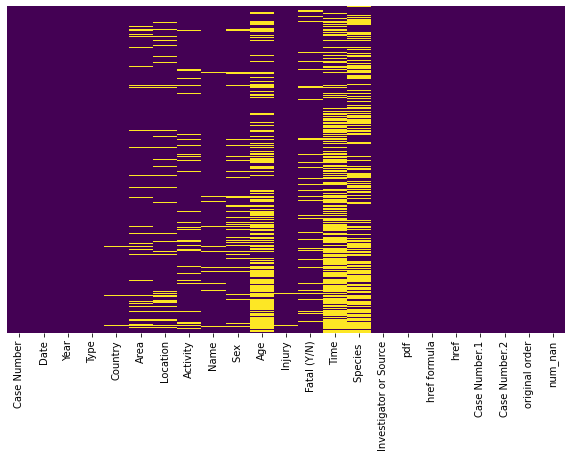

In [26]:
check_nan(sharks1)

In [27]:
sharks1["Species "].head()


0        White shark
1                NaN
2                NaN
3          2 m shark
4    Tiger shark, 3m
Name: Species , dtype: object

In [196]:
new_column = []
for c in sharks1.columns:
    c = c.replace(" ","")
    c = c.replace(".","")
    c = c.replace("Fatal(Y/N)","Fata_bin")
    
    new_column.append(c)
sharks1.columns = new_column

In [194]:
sharks1.columns

Index(['CaseNumber', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_bin', 'Time',
       'Species', 'InvestigatororSource', 'pdf', 'hrefformula', 'href',
       'CaseNumber1', 'CaseNumber2', 'originalorder', 'num_nan', 'mean_age'],
      dtype='object')

In [195]:
sharks1.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan,mean_age
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,57.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,1,11.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,1,48.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2,0.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2,0.0


In [31]:
sharks1.dtypes

CaseNumber               object
Date                     object
Year                    float64
Type                     object
Country                  object
Area                     object
Location                 object
Activity                 object
Name                     object
Sex                      object
Age                      object
Injury                   object
Fatal_bin                object
Time                     object
Species                  object
InvestigatororSource     object
pdf                      object
hrefformula              object
href                     object
CaseNumber1              object
CaseNumber2              object
originalorder           float64
num_nan                   int64
dtype: object

In [32]:
sharks1.Country.value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [33]:
sharks1.Country.fillna('unknown', inplace=True)

'N nan cols: 15'

CaseNumber               0.015868
Year                     0.031736
Type                     0.063472
Area                     7.219930
Location                 8.568708
Activity                 8.632180
Name                     3.332275
Sex                      8.965408
Age                     44.922247
Injury                   0.444303
Fatal_bin                8.552840
Time                    53.221200
Species                 45.033323
InvestigatororSource     0.269756
hrefformula              0.015868
dtype: float64

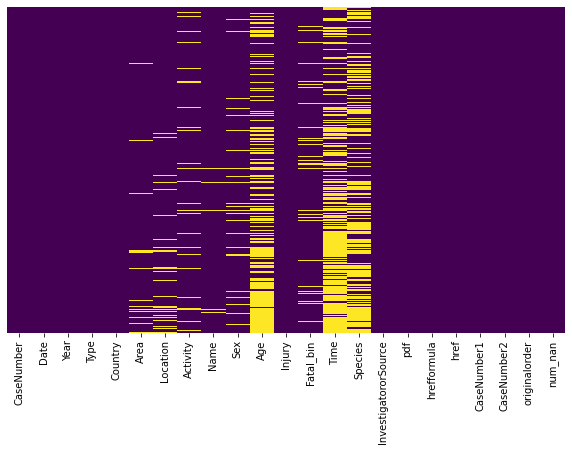

In [34]:
check_nan(sharks1)

In [35]:
bad_index_Area=sharks1.Area[sharks.Area.isna()].index
bad_index_Area[:10]

Int64Index([32, 33, 48, 56, 59, 62, 90, 101, 129, 132], dtype='int64')

In [36]:
bad_index_Location=sharks1.Location[sharks.Location.isna()].index
bad_index_Location[:10]

Int64Index([56, 62, 101, 110, 132, 151, 171, 174, 180, 187], dtype='int64')

In [37]:
sharks1.iloc[bad_index_Area]

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan
32,2018.04.09,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,NaN,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,NaN,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0,4
33,2018.04.05,05-Apr-2018,2018.0,Unprovoked,BAHAMAS,NaN,Bimini,Swimming,Shane McConnell,M,12,"2 puncture wounds to left foot, abrasion to ri...",N,18h00,Bull shark,"K. McMurray, TrackingSharks.com",2018.04.05-McConnell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.05,2018.04.05,6270.0,1
48,2018.01.21,21-Jan-2018,2018.0,Unprovoked,NEW CALEDONIA,NaN,Nouville,Spearfishing,male,M,40s,Injuries to abdomen and arm,N,15h30,"Bull shark, 3 m",TrackingSharks.com,2018.01.21-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.21,2018.01.21,6255.0,1
56,2017.12.09,09-Dec-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Snorkeling,Sarah Illig-Carroll,F,25,Minor injury to arm,N,NaN,Nurse shark. 5',"Daily Star, 12/11/2017",2017.12.09-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.09,2017.12.09,6247.0,3
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,ND.0011,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,NaN,Foot severed,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",ND-0011-Masury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0011,ND.0011,12.0,5
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,4
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,4
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,4


In [38]:
sharks1.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,1
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,1
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2


'N nan cols: 15'

CaseNumber               0.015868
Year                     0.031736
Type                     0.063472
Area                     7.219930
Location                 8.568708
Activity                 8.632180
Name                     3.332275
Sex                      8.965408
Age                     44.922247
Injury                   0.444303
Fatal_bin                8.552840
Time                    53.221200
Species                 45.033323
InvestigatororSource     0.269756
hrefformula              0.015868
dtype: float64

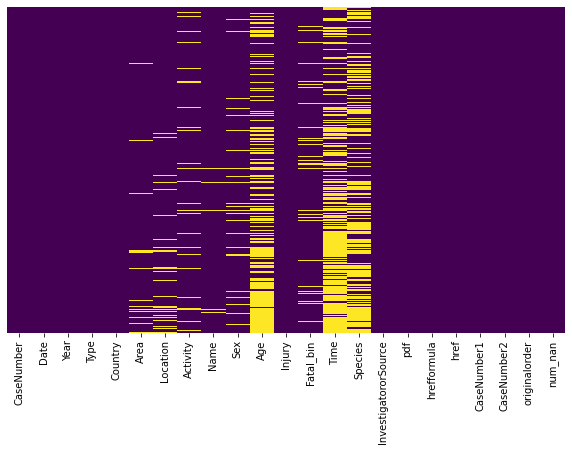

In [39]:
check_nan(sharks1)

In [40]:
sharks1[['Type', 'Activity','Name','Sex','Age','Time','Fatal_bin','Species','Location','Area','Injury']] = sharks1[['Type', 'Activity','Name','Sex','Age','Time','Fatal_bin','Species','Location','Area','Injury']].fillna('unknown')

'N nan cols: 4'

CaseNumber              0.015868
Year                    0.031736
InvestigatororSource    0.269756
hrefformula             0.015868
dtype: float64

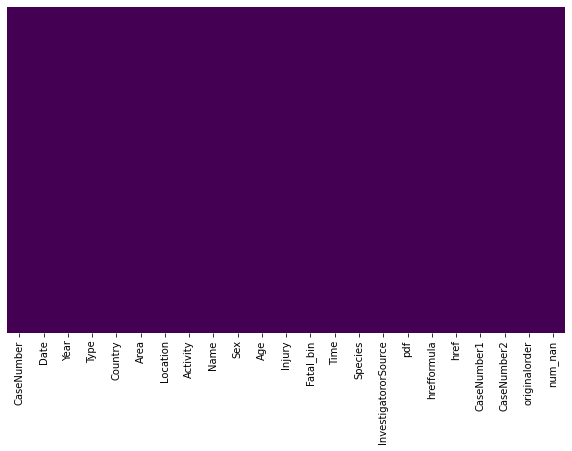

In [41]:
check_nan(sharks1)

In [42]:
sharks1.Name.value_counts()[:40]

male                          550
unknown                       213
female                         97
boy                            23
2 males                        16
boat                           14
child                          12
males                          10
sailor                         10
Anonymous                      10
a sailor                        8
girl                            7
fisherman                       6
a pearl diver                   6
Unidentified                    6
a soldier                       5
a native                        5
2 fishermen                     4
Arab boy                        4
black male                      4
Unknown                         4
Andre Hartman                   3
2 women                         3
Japanese diver                  3
aboriginal male                 3
 male                           3
woman                           3
Russian male                    3
M.C.                            3
Zulu male     

In [43]:
sharks1['Type'] = sharks1['Type'].replace(['Boat','Boatomg'], 'Boating')

In [44]:

new_column2 = []
for c in sharks1.Age:
    c = c.replace(" ","")
  
    
    
    new_column2.append(c)
sharks1.Age = new_column2

In [45]:
sharks1.Age.value_counts()

unknown    2831
17          154
18          150
20          142
19          142
           ... 
32&30         1
60's          1
20?           1
7&31          1
13or14        1
Name: Age, Length: 151, dtype: int64

In [46]:
import re

re.findall('\d+', '13uasdiuhadsu12askjdaks14')[:3]

['13', '12', '14']

In [47]:
from statistics import mean
def mean_Age(x):
    x = x.lower()
    num=re.findall('\d+', x)[:5]
    
    
    res = [eval(i) for i in num]
    

    if num:
        return mean(res)
    elif "teen" in x:
        return 15.5
    elif "young" in x:
        return 18.5
    elif "adult" in x:
        return 49
    elif "elderly" in x:
        return 70
    elif "middle" in x :
        return 50
    elif "18months" in x:
        return 1.5
    elif "9months" in x:
        return 0.75
    elif "2to3months" in x:
        return 0.2
    else:
        return 0
    
    
    
    
    

In [48]:
sharks1['mean_age']=sharks1.Age.apply(mean_Age)

    

In [49]:
keyword='67'
select=sharks1[sharks1.Age.str.contains(keyword, regex=True)]
select

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan,mean_age
2848,1985.08.17,17-Aug-1985,1985.0,Invalid,USA,Florida,"Bayport, Hernando County",Scuba diving,Thomas Robert Sewell,M,67,Body not recovered. 3 days later some of his e...,unknown,10h30,Shark involvement prior to death not confirmed,"E. Pace, GSAF; J. McAniff, NUADC; Orlando Sen...",1985.08.17-Sewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1985.08.17,1985.08.17,3455.0,1,67.0
3986,1960.06.07,07-Jun-1960,1960.0,Invalid,USA,California,"10 miles off Santa Barbara, Santa Barbara County",Testing classified underwater electronic gear ...,"Paul Timothy Lovette, Dr. Neal Beardsley, Jame...",M,"37,67,35,27,?&27","Legs & arms bitten, coroner unable to determin...",unknown,unknown,Shark involvement prior to death was not confi...,"L.A. Times, 6/10/1960; L. Schultz & M. Malin, ...",1960.06.07-Raytheon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.06.07,1960.06.07,2317.0,2,38.6


In [50]:
sharks1.mean_age.value_counts()

0.0     2839
17.0     155
20.0     152
18.0     151
19.0     145
        ... 
84.0       1
86.0       1
72.0       1
82.0       1
13.5       1
Name: mean_age, Length: 98, dtype: int64

In [51]:
sharks1.mean_age.value_counts()

0.0     2839
17.0     155
20.0     152
18.0     151
19.0     145
        ... 
84.0       1
86.0       1
72.0       1
82.0       1
13.5       1
Name: mean_age, Length: 98, dtype: int64

In [52]:
sharks2 = sharks1.copy()

In [53]:
sharks2.Fatal_bin.value_counts()

N          4293
Y          1388
unknown     539
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal_bin, dtype: int64

In [54]:
new_column3 = []
for c in sharks2.Fatal_bin:
    c = c.lower()
    c = c.replace(" ","")
    c = c.replace("m","unknown")
    c = c.replace("2017","y")
  
    
    
    new_column3.append(c)
sharks2.Fatal_bin = new_column3

In [55]:
keyword='.'
select2=sharks2[sharks2.Sex.str.contains(keyword, regex=True)]
select2

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan,mean_age
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,57.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,1,11.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,1,48.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,n,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2,0.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,unknown,FATAL,y,unknown,unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,3,0.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,unknown,Pearl diving,Ahmun,M,unknown,FATAL,y,unknown,unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,4,0.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,unknown,FATAL,y,unknown,unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,3,0.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,unknown,"Panama Bay 8ºN, 79ºW",unknown,Jules Patterson,M,unknown,FATAL,y,unknown,unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,5,0.0


In [56]:
sharks2.Sex.unique()

array(['F', 'M', 'unknown', 'M ', 'lli', 'N', '.'], dtype=object)

In [57]:
new_column4 = []
for c in sharks2.Sex:
    
    c = c.replace(" ","")
    c = c.replace("lli","M")
    c = c.replace("N","unknown")
    c = c.replace(".","unknown")
  
    
    
    new_column4.append(c)
sharks2.Sex = new_column4

In [58]:
lst=[]
for x in sharks2.CaseNumber:
    x= str(x)
    lst.append('-'.join(x.split('.')[:3]))
 


In [59]:
sharks2['CaseNumber']=lst #SOBREESCRIBIR la lista a la columna

sharks2['CaseNumber'][sharks2['CaseNumber'].str.startswith('ND')] = 'unknown' 

sharks2['CaseNumber'][sharks2['CaseNumber'].str.startswith('0')] = 'unknown' 

sharks2['CaseNumber'][sharks2['CaseNumber'].str.startswith('x')] ='unknown'

In [60]:
sharks2.CaseNumber.value_counts().head()

unknown       128
1950-00-00     13
1957-00-00     11
1942-00-00     11
1960-00-00     10
Name: CaseNumber, dtype: int64

In [61]:
sharks2.dtypes

CaseNumber               object
Date                     object
Year                    float64
Type                     object
Country                  object
Area                     object
Location                 object
Activity                 object
Name                     object
Sex                      object
Age                      object
Injury                   object
Fatal_bin                object
Time                     object
Species                  object
InvestigatororSource     object
pdf                      object
hrefformula              object
href                     object
CaseNumber1              object
CaseNumber2              object
originalorder           float64
num_nan                   int64
mean_age                float64
dtype: object

In [62]:
sharks2.Species.value_counts().head()

unknown                                               2838
White shark                                            163
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         88
Name: Species, dtype: int64

In [63]:
sharks2.Species.value_counts()[:10]

unknown                                               2838
White shark                                            163
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         88
Tiger shark                                             73
Shark involvement prior to death unconfirmed            68
Bull shark                                              52
4' shark                                                40
6' shark                                                40
Name: Species, dtype: int64

In [64]:
keyword='not confirmed'
select2=sharks2[sharks2.Species.str.contains(keyword, regex=True)]
select2

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan,mean_age
16,2018-05-09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,unknown,"No injury, surfboard damaged",n,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0,1,0.0
31,2018-04-10,Reported 10-Apr-2018,2018.0,Invalid,BRAZIL,Alagoas,"Praia de Sauaçuhy, Maceió",Fishing,Josias Paz,M,56,Injury to ankle from marine animal trapped in ...,n,unknown,Shark involvement not confirmed,"K. McMurray, TrackingSharks.com",2018.04.10.R-Paz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.10.R,2018.04.10.R,6272.0,1,56.0
115,2017-07-20,20-Jul-2017,2017.0,Invalid,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Ellie Rogier,F,8,Foot injured,unknown,unknown,Shark involvement not confirmed,"C. Creswell, GSAF",2017.07.20.c-Rogier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.20.c,2017.07.20.c,6188.0,2,8.0
124,2017-07-02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,unknown,unknown,unknown,"Skull found in shark, a probable drowning & sc...",unknown,unknown,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0,5,0.0
153,2017-04-20,20-Apr-2017,2017.0,Invalid,USA,South Carolina,Georgetown County,Swimming,male,M,unknown,Laceration & puncture wounds to left foot,unknown,08h50,Shark involvement not confirmed,"C. Creswell, GSAF",2017.04.20-PawleysIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.20,2017.04.20,6150.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5426,1909-01-00,Jan-1909,1909.0,Invalid,ITALY,Sicily,"Off Capo San Croce, near Augusta (Catania)","On December 28, 1908, an earthquake, followed ...",unknown,unknown,unknown,"3 unidentified bodies recovered (male, female...",unknown,unknown,Shark involvement prior to death was not confi...,MEDSAF,1909.01.00-Messina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1909.01.00,1909.01.00,877.0,5,0.0
5486,1905-12-29,29-Dec-1905,1905.0,Invalid,AUSTRALIA,Western Australia,Geraldton,Bathing,Hugh Carroll,M,unknown,"""Bad wound in the leg"" - 7-ft shark caught in ...",unknown,unknown,Shark involvement not confirmed,"The Advertiser, 12/30/1905",1905.12.29-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.12.29,1905.12.29,817.0,3,0.0
5493,1905-07-25,Reported 25-Jul-1905,1905.0,Invalid,ITALY,unknown,Naples,unknown,boy,M,8,"Body recovered from shark, probable drowning a...",unknown,unknown,Shark involvement prior to death was not confi...,"C. Moore, GSAF",1905.07.25.R-Naples.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.07.25.R,1905.07.25.R,810.0,4,8.0
5577,1899-06-02,02-Jun-1899,1899.0,Invalid,NEW ZEALAND,North Island,East Cape,Attempting to land a boat from the Hinemoa,N. Buchanan,M,unknown,FATAL,unknown,unknown,Shark involvement not confirmed,"Brisbane Courier, 6/7/1899",1899.06.02-Buchanan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1899.06.02,1899.06.02,726.0,3,0.0


In [65]:
sharks2.shape

(6302, 24)

In [66]:
new_column5= []
t= "not confirmed"
for c in sharks2.Species:
    if t in c:
        new_column5.append("unknown")
    else:
        new_column5.append(c)
  
    
    
    
sharks2.Species = new_column5



In [67]:
sharks2.Species.value_counts().head()


unknown                                         3062
White shark                                      163
Invalid                                          102
Tiger shark                                       73
Shark involvement prior to death unconfirmed      68
Name: Species, dtype: int64

In [68]:
keyword='wobbegong'
select2=sharks2[sharks2.Species.str.contains(keyword, regex=True)]
select2

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan,mean_age
43,2018-02-14,14-Feb-2018,2018.0,Invalid,AUSTRALIA,Queensland,Mooloolaba Beach,Swimming,Sharna Babd,F,unknown,"Collision / No injury, no attack",n,18h00,Possibly a wobbegong,"Sunshine Coast Daily, 2/15/2018",2018.02.14-Babd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.14,2018.02.14,6260.0,1,0.0


In [69]:
sharks3 = sharks2.copy()

In [70]:
keyword = "invalid"
sharks3.drop(sharks3[sharks3.Species.str.contains(keyword, regex=True)].index, axis=0, inplace=True)

In [71]:
sharks3.shape

(6302, 24)

In [72]:
sharks2.shape

(6302, 24)

In [73]:
sharks3.Species[:20]

0               White shark
1                   unknown
2                   unknown
3                 2 m shark
4           Tiger shark, 3m
5                   unknown
6               Tiger shark
7           Lemon shark, 3'
8            Bull shark, 6'
9                   unknown
10          Grey reef shark
11                  unknown
12                  unknown
13         Invalid incident
14    Tawny nurse shark, 2m
15                  unknown
16                  unknown
17                  unknown
18              Tiger shark
19                  unknown
Name: Species, dtype: object

In [74]:
keyword='zambezi'
select3=sharks3[sharks3.Species.str.contains(keyword, regex=True)]
select3.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan,mean_age


In [75]:
shark_list = ["bull","tiger","white","galapagos","mako","silky","wobbegong","zambezi","nurse","raggedtooth","hammerhead","blue","sandtiger","blacktip","bronze whaler","small","spinner","grey reef","zambesi","lemon","basking","sevengill","caribbean reef","dog","gill","black-tipped","sand","gray","copper","cow","leopard","soupfin","juvenile","black tipped","dusky","reef","grey","young","little"]
for i in shark_list:
    new_column7= []
    for c in sharks3.Species:
        i = i.lower()
        if i in c.lower():
            new_column7.append(i+" shark")
        else:
            new_column7.append(c.lower())
    sharks3.Species = new_column7

In [76]:
def limpiar_species(x):
    x = x.lower()

    if 'not confirmed' in x:
        return 'shark attack not confirmed'
    elif "not cofirmed" in x:
        return 'shark attack not confirmed'
    elif 'unconfirmed' in x:
        return 'shark attack not confirmed'
    elif 'questionable' in x:
        return 'shark attack not confirmed'
    elif 'questionable' in x:
        return 'shark attack not confirmed'
    elif 'doubtful' in x:
        return 'shark attack not confirmed'
    elif 'authenticated' in x:
        return 'shark attack not confirmed'
    elif 'several sharks' in x:
        return 'unknown'
    elif 'very large' in x:
        return 'unknown'
    elif 'not a shark' in x:
        return 'unknown'
    elif 'no shark' in x:
        return 'unknown'
    elif '?' in x:
        return 'unknown'
    elif 'possibly' in x:
        return 'unknown'
    elif re.findall("[0-9]",x) :
        return 'unknown'
    elif 'unidentified' in x:
        return 'unknown'
    elif "black tipped" in x:
        return "blacktip"
    elif "black-tipped" in x:
        return "blacktip"
    elif len(x) >=21 :
        return "unknown"
    elif '""' in x:
        return
    elif "shark" in x:
        return x
    
    elif "invalid" in x:
        return "unknown"
    else:
        return "unknown"

In [77]:
sharks3.Species=sharks3.Species.apply(limpiar_species)

In [78]:
sharks3.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan,mean_age
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,57.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,1,11.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,1,48.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,n,unknown,unknown,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2,0.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,unknown,tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2,0.0


In [79]:
sharks3.shape

(6302, 24)

'N nan cols: 3'

Year                    0.031736
InvestigatororSource    0.269756
hrefformula             0.015868
dtype: float64

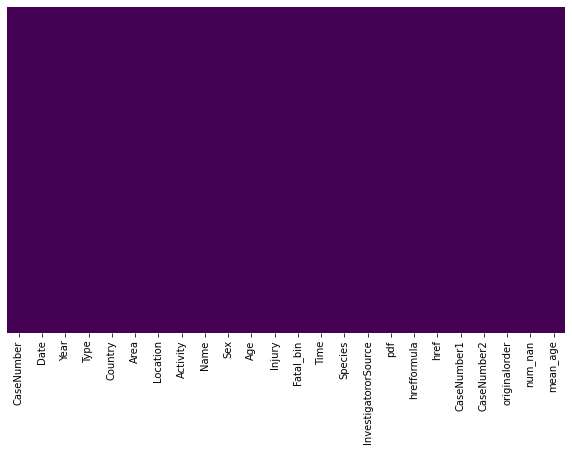

In [80]:
check_nan(sharks3)

In [81]:
#sharks3.Year.fillna(np.where(sharks3['Year'].isnull())[0], inplace=True)

In [82]:
sharks3.loc[187, 'Year'] = 2017

In [83]:
sharks3.loc[6079, 'Year']= 1836

In [84]:
sharks3[['InvestigatororSource','hrefformula']] = sharks3[['InvestigatororSource','hrefformula']].fillna('unknown')

In [182]:
def activity(x):
    activities = {"Fishing":re.search(".*[Ff](ishing|ISHING).*",str(x)),
                    "Swimming":re.search(".*[Ss](wimming|WIMMing).*",str(x)),
                    "Kite":re.search(".*[Kk](ite|ITE).*",str(x)),
                    "Walking":re.search(".*[Ww](alking|ALKING).*",str(x)),
                    "Boogie Board":re.search(".*[Bb](oogie|OOGIE).*",str(x)),
                    "Body Boarding":re.search(".*[Bb](ody|ODY).*",str(x)),
                    "Wind Surfing":re.search(".*[wW](ind|IND).*",str(x)),
                    "Boat":re.search(".*[Bb](oat|OAT).*",str(x)),
                    "Interact with sharks":re.search(".*[Ss](hark|HARK).*",str(x)),
                    "Diving":re.search(".*[Dd](iving|IVING).*",str(x)),
                    "Standing in water":re.search(".*[Ss](tand|TAND).*",str(x)),
                    "Paddling":re.search(".*[Pp](addl|ADDL).*",str(x)),
                    "Bathing":re.search(".*[Bb](athing|ATHING).*",str(x)),
                    "OverBoard":re.search(".*[Oo](verb|VERB).*",str(x)),
                    "Bathing":re.search(".*[Bb](athing|ATHING).*",str(x)),
                    "Floating":re.search(".*[Ff](loat|LOAT).*",str(x)),
                    "Jumping":re.search(".*[Jj](ump|UMP).*",str(x))}
    for key,values in activities.items():
        if values:
            return key
    return "other"


In [183]:
sharks3.Activity=sharks3.Activity.apply(activity)

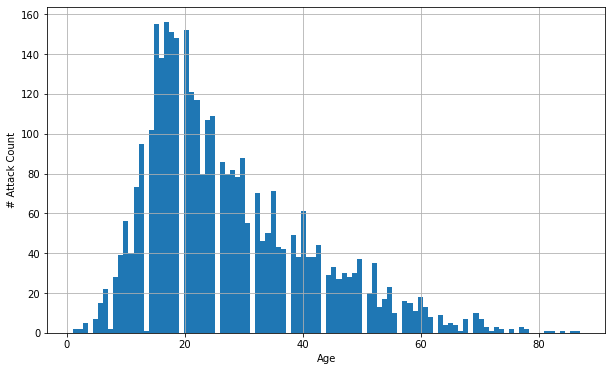

In [89]:
data=sharks3[sharks3.mean_age > 0.2].mean_age

plt.figure(figsize=(10, 6))

data.hist(bins=100)

plt.ylabel('# Attack Count')
plt.xlabel('Age');

In [90]:
sharks4 = sharks3.copy()

In [92]:
is_y =  sharks4['Fatal_bin']=="y"

In [104]:
is_n = sharks4['Fatal_bin']=="n"

In [131]:
is_f = sharks4['Sex']=="F"

In [132]:
is_m = sharks4['Sex']=="M"

In [105]:
sharks4_n = sharks4[is_n]

In [133]:
sharks4_f = sharks4[is_f]

In [134]:
sharks4_m = sharks4[is_m]

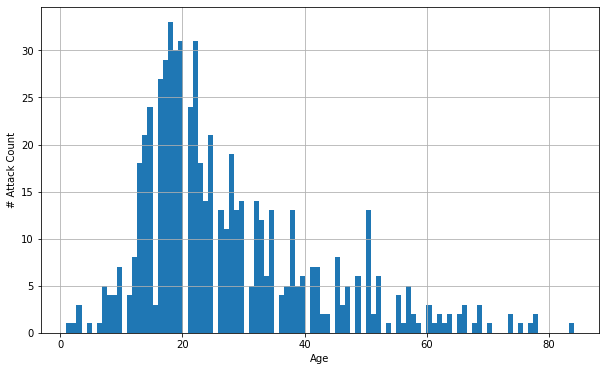

In [184]:
data2=sharks4_y[sharks4_y.mean_age > 0.2].mean_age

plt.figure(figsize=(10, 6))

data2.hist(bins=100)

plt.ylabel('# Attack Count')
plt.xlabel('Age');

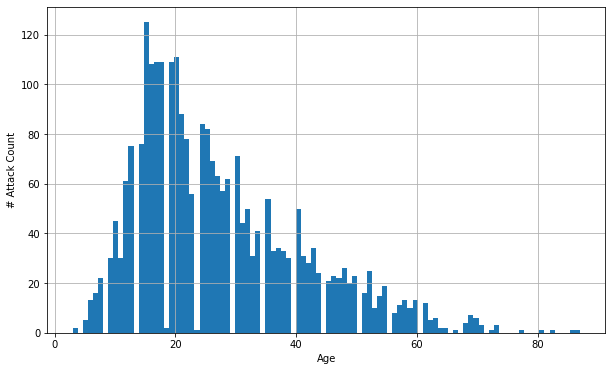

In [106]:
data3=sharks4_n[sharks4_n.mean_age > 0.2].mean_age

plt.figure(figsize=(10, 6))

data3.hist(bins=100)

plt.ylabel('# Attack Count')
plt.xlabel('Age');

In [164]:
dead = sharks4_y[sharks4_y.mean_age > 0.2].mean_age



In [165]:
dead.mean(axis=0)

27.105348460291733

In [166]:
not_dead = sharks4_n[sharks4_n.mean_age > 0.2].mean_age

In [169]:
not_dead.mean(axis=0)

27.219325153374232

In [168]:
dead.describe().T #Deadly Attacks

count    617.000000
mean      27.105348
std       14.335252
min        1.000000
25%       17.000000
50%       22.000000
75%       33.000000
max       84.000000
Name: mean_age, dtype: float64

In [157]:
all_att = sharks4[sharks4.mean_age > 0.2].mean_age

In [159]:
all_att.describe().T #All Attacks

count    3463.000000
mean       27.293994
std        13.896124
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: mean_age, dtype: float64

In [171]:
not_dead.describe().T #Non Deadly Attacks

count    2608.000000
mean       27.219325
std        13.693863
min         3.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: mean_age, dtype: float64

In [115]:
sharks4.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,num_nan,mean_age
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,57.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,1,11.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,1,48.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,male,M,unknown,Minor injury to lower leg,n,unknown,unknown,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,2,0.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,unknown,tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,2,0.0


In [174]:
all_male = all_att[sharks4['Sex']=="M"]

In [175]:
all_male.describe().T

count    2963.000000
mean       27.444516
std        13.483883
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: mean_age, dtype: float64

In [172]:
all_fem = all_att[sharks4['Sex']=="F"]

In [173]:
all_fem.describe().T

count    463.000000
mean      26.681425
std       16.334422
min        1.000000
25%       14.000000
50%       21.000000
75%       37.000000
max       77.000000
Name: mean_age, dtype: float64

In [176]:
male_dead = dead[sharks4['Sex']=="M"]

In [177]:
male_dead.describe().T

count    540.000000
mean      26.755556
std       13.522004
min        1.000000
25%       17.000000
50%       22.000000
75%       33.000000
max       84.000000
Name: mean_age, dtype: float64

In [178]:
female_dead = dead[sharks4['Sex']=="F"]

In [179]:
female_dead.describe().T

count    69.000000
mean     30.231884
std      19.135081
min       2.000000
25%      16.000000
50%      24.000000
75%      42.000000
max      77.000000
Name: mean_age, dtype: float64

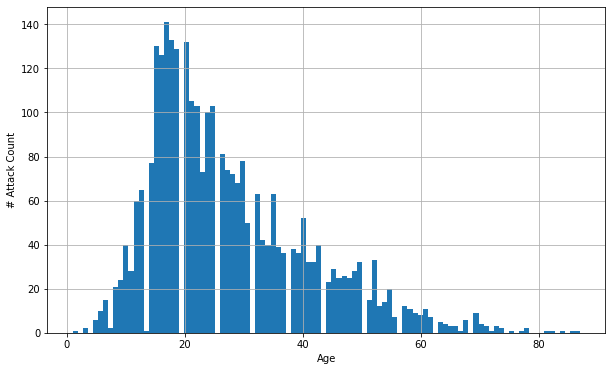

In [185]:
data3=sharks4_m[sharks4_m.mean_age > 0.2].mean_age

plt.figure(figsize=(10, 6))

data3.hist(bins=100)

plt.ylabel('# Attack Count')
plt.xlabel('Age');

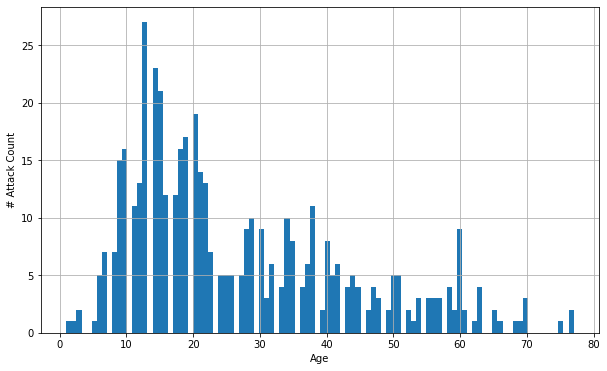

In [186]:
data5=sharks4_f[sharks4_f.mean_age > 0.2].mean_age

plt.figure(figsize=(10, 6))

data5.hist(bins=100)

plt.ylabel('# Attack Count')
plt.xlabel('Age');

In [199]:
sharks4.corr()

,Year,originalorder,num_nan,mean_age,sex_bin,fatal_bin
Year,1.000000,0.388636,-0.207517,0.170086,-0.021185,-0.139131
originalorder,0.388636,1.000000,-0.446579,0.404503,-0.066168,-0.328824
num_nan,-0.207517,-0.446579,1.000000,-0.581713,-0.231973,0.167189
mean_age,0.170086,0.404503,-0.581713,1.000000,0.115340,-0.092591
sex_bin,-0.021185,-0.066168,-0.231973,0.115340,1.000000,0.048445
fatal_bin,-0.139131,-0.328824,0.167189,-0.092591,0.048445,1.000000


In [188]:
def sex_bin(x):
    if x == "M":
        return 1
    else:
        return 0
    
    

In [189]:
sharks4['sex_bin']=sharks4.Sex.apply(sex_bin)

In [205]:
sharks4.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_bin,Time,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber1,CaseNumber2,originalorder,mean_age
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",n,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,57.0
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson McNeely,F,11,Minor injury to left thigh,n,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,11.0
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,48,Injury to left lower leg from surfboard skeg,n,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,48.0
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,male,M,unknown,Minor injury to lower leg,n,unknown,unknown,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0.0
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,n,unknown,tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0.0


In [197]:
def fatal_bin(x):
    if x == "y":
        return 1
    else:
        return 0

In [198]:
sharks4['fatal_bin']=sharks4.Fatal_bin.apply(fatal_bin)

In [202]:
del sharks4['sex_bin']

In [204]:
del sharks4['num_nan']

In [206]:
sharks4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseNumber            6302 non-null   object 
 1   Date                  6302 non-null   object 
 2   Year                  6302 non-null   float64
 3   Type                  6302 non-null   object 
 4   Country               6302 non-null   object 
 5   Area                  6302 non-null   object 
 6   Location              6302 non-null   object 
 7   Activity              6302 non-null   object 
 8   Name                  6302 non-null   object 
 9   Sex                   6302 non-null   object 
 10  Age                   6302 non-null   object 
 11  Injury                6302 non-null   object 
 12  Fatal_bin             6302 non-null   object 
 13  Time                  6302 non-null   object 
 14  Species               6302 non-null   object 
 15  InvestigatororSource 

In [209]:
for c in sharks4.select_dtypes('float').columns:
    
    sharks4[c]=pd.to_numeric(sharks4[c], downcast='float')
sharks4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseNumber            6302 non-null   object 
 1   Date                  6302 non-null   object 
 2   Year                  6300 non-null   float32
 3   Type                  6302 non-null   object 
 4   Country               6302 non-null   object 
 5   Area                  6302 non-null   object 
 6   Location              6302 non-null   object 
 7   Activity              6302 non-null   object 
 8   Name                  6302 non-null   object 
 9   Sex                   6302 non-null   object 
 10  Age                   6302 non-null   object 
 11  Injury                6302 non-null   object 
 12  Fatal_bin             6302 non-null   object 
 13  Time                  6302 non-null   object 
 14  Species               6302 non-null   object 
 15  InvestigatororSource 

In [210]:
sharks4.to_csv("attacks_clean.csv", index = False)